# Finding the Best Markets to Advertise In

An e-learning company offers courses on programming. Most of the courses are on web and mobile development, but they also cover many other domains, like data science, game development, etc. They want to promote their product and would like to invest some money in advertisement. The goal of this project is to find out the two best markets to advertise their products.

The data will come from *2017-fCC-New-Coders-Survey-Data.csv*, which is freeCodeCamp's 2017 New Coder Survey.  freeCodeCamp is a free e-learning platform that offers courses on web development.  Their survey covers the area of interest for this project, and since freeCodeCamp has a large number of followers, there will be plenty of data to use.  Using this survey saves time, as it negates the need to conduct a lengthy survey on one's own.  The repository for this data set can be found [here](https://github.com/freeCodeCamp/2017-new-coder-survey).  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns
%matplotlib inline

# Importing CSV file and getting basic information about the dataframe

coder_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
print(coder_survey.head(5))
print("Number of rows: " + str(coder_survey.shape[0]))
print("Number of columns: " + str(coder_survey.shape[1]))
print("Columns: ")
print(coder_survey.columns)

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   NaN                 

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Determining If Sample Represents Population

The **JobRoleInterest** column will help determine whether the sample (this data set) is representative of the entire population (potential students).

                                                    JobRoleInterest
Full-Stack Web Developer                                   0.117706
  Front-End Web Developer                                  0.064359
  Data Scientist                                           0.021739
Back-End Web Developer                                     0.020309
  Mobile Developer                                         0.016733
Game Developer                                             0.016304
Information Security                                       0.013158
Full-Stack Web Developer,   Front-End Web Devel...         0.009153
  Front-End Web Developer, Full-Stack Web Devel...         0.008009
  Product Manager                                          0.007866
Data Engineer                                              0.007580
  User Experience Designer                                 0.007437
  User Experience Designer,   Front-End Web Dev...         0.006150
  Front-End Web Developer, Back-End Web Develop.

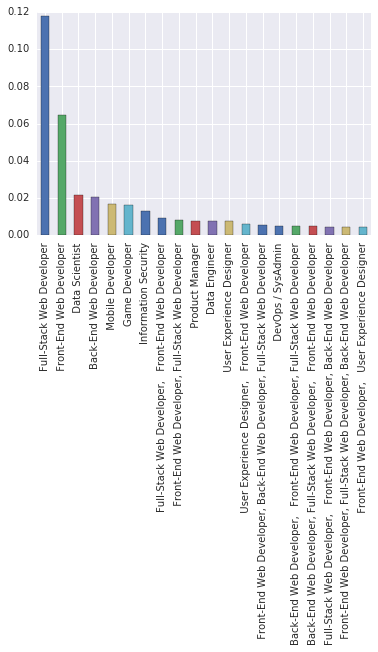

In [2]:
# Generating a frequency distribution table for JobRoleInterest in percentage

JobRoleSeries = coder_survey['JobRoleInterest'].value_counts(normalize = True).sort_values(ascending = False)
print(JobRoleSeries.to_frame())

JobRoleSeries[0:20].plot.bar()

When generating a frequency table for the **JobRoleInterest** column, the results aren't particularly useful, since there are over 3000 types of responses for it.  It will be easier to group responses by those who are interested in web development or mobile development.  

6992
86.24% of participants are interested in mobile or web development


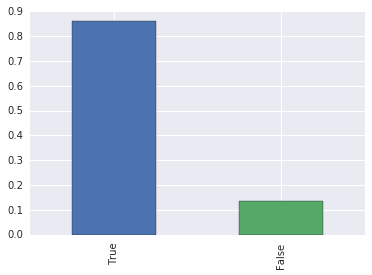

In [3]:
# Creating a copy of the survey that does not include rows where
# JobRoleInterest is null
interests = coder_survey.dropna(subset=['JobRoleInterest']).copy()
print(interests.shape[0])

# Creating a column indicating whether or not a participant is interested in
# web, game,or mobile development, as well as data science

interests['Web Interest'] = interests['JobRoleInterest'].str.contains('Web Developer', regex=False)
interests['Mobile Interest'] = interests['JobRoleInterest'].str.contains('Mobile Developer', regex=False)
interests['Web Or Mobile Interest'] = interests['Mobile Interest'] | interests['Web Interest']

# Percentage of survey participants that expressed in web or mobile development
print(str(round(((interests[interests['Web Or Mobile Interest'] == True].shape[0]/interests.shape[0])*100),2)) + "% of participants are interested in mobile or web development")


interests['Web Or Mobile Interest'].value_counts(normalize = True).sort_values(ascending = False).plot.bar()

other_interests = """



coder_survey['Data Interest'] = coder_survey['JobRoleInterest'].str.contains('Data', regex=False)
coder_survey['Game Interest'] = coder_survey['JobRoleInterest'].str.contains('Game Developer', regex=False)
coder_survey['Subject Interest'] = coder_survey['Mobile Interest'] | coder_survey['Web Interest'] | coder_survey['Data Interest'] | coder_survey['Game Interest']

# Percentage of survey participants that expressed in 
# one of the 4 subjects taught
print(str(round(((coder_survey[coder_survey['Subject Interest'] == True].shape[0]/coder_survey.shape[0])*100),2)) + "% of participants are interested in web, game,or mobile development, as well as data science")


coder_survey['Subject Interest'].value_counts(normalize = True).sort_values(ascending = False).plot.bar()


"""

Over 86% of respondents are interested in web or mobile development, which is a considerable amount.  However...

                                                    JobRoleInterest
NaN                                                        0.615296
Full-Stack Web Developer                                   0.045282
  Front-End Web Developer                                  0.024759
  Data Scientist                                           0.008363
Back-End Web Developer                                     0.007813
  Mobile Developer                                         0.006437
Game Developer                                             0.006272
Information Security                                       0.005062
Full-Stack Web Developer,   Front-End Web Devel...         0.003521
  Front-End Web Developer, Full-Stack Web Devel...         0.003081


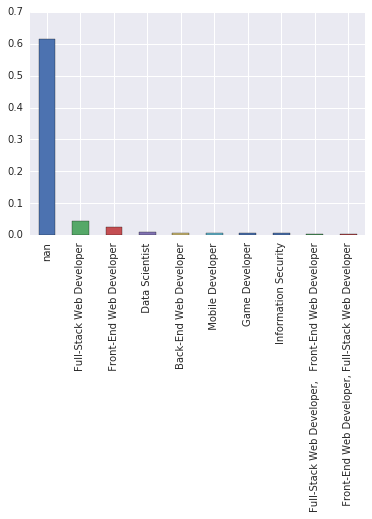

In [4]:
# Generating a relative frequency table for all rows, including those that
# did not enter a JobRoleInterest

JobRoleSeriesNA = coder_survey['JobRoleInterest'].value_counts(normalize = True, dropna=False).sort_values(ascending = False)
print(JobRoleSeriesNA.to_frame()[0:10])

JobRoleSeriesNA[0:10].plot.bar()

Over 60% of the survey's respondents did not specify an interest.  It would be better to have 18000+ rows to work with, but the roughly 7000 data points (those who specified interests) is still a decent number to work with.

The **CountryLive** column will be examined to see which countries have the most respondents, which could mean potential markets.

                          CountryLive
United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89


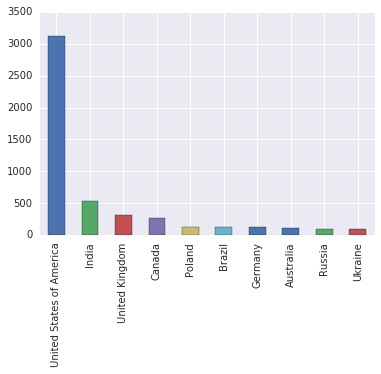

In [5]:
# Generating an absolute frequency table for CountryLive column

CountryLiveSeries = interests['CountryLive'].value_counts().sort_values(ascending = False)

# Printing and generating a plot of the top 10 countries

print(CountryLiveSeries.to_frame()[0:10])

CountryLiveSeries[0:10].plot.bar()

                          CountryLive
United States of America     0.457005
India                        0.077216
United Kingdom               0.046066
Canada                       0.038023
Poland                       0.019158
Brazil                       0.018865
Germany                      0.018280
Australia                    0.016379
Russia                       0.014917
Ukraine                      0.013016


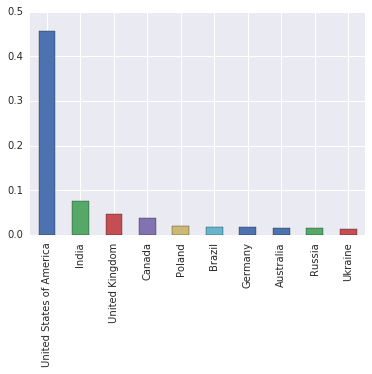

In [6]:
# Generating a relative frequency table for CountryLive column, but limiting

CountryLiveSeries_R = interests['CountryLive'].value_counts(normalize = True).sort_values(ascending = False)

# Printing and generating a plot of the top 10 countries

print(CountryLiveSeries_R.to_frame()[0:10])

CountryLiveSeries_R[0:10].plot.bar()

Based on the frequency tables, it appears that the United States, India, the United Kingdom, and Canada are the largest markets which to advertise.  Those four countries will be examined further.

There are a number of other columns to consider for additional insight, such as MoneyForLearning (i.e. how much money a respondent spent from the moment they started coding until the moment they completed the survey).  It might be beneficial to break it even further down, by figuring out how much money a respondent has spent per month learning.  

In [7]:
# Replacing any rows that have 0 months in the MonthsProgramming column
interests["MonthsProgramming"].replace(0,1,inplace=True)

# Creating a column for money spent per month for each respondent
interests['MonthlySpending'] = interests["MoneyForLearning"]/interests["MonthsProgramming"]

# Determining number of rows with null values for MonthlySpending
print(interests["MonthlySpending"].isna().value_counts())

False    6317
True      675
Name: MonthlySpending, dtype: int64


Since less than 10% of the respondents don't have a monthly spending amount to go by, they will be dropped.  The mean will be calculated.

In [8]:
# Dropping rows with null values for MonthlySpending

monthly_spenders = interests.dropna(subset=['MonthlySpending']).copy()

# Creating separate dataframes for respondents in the US, UK, India, and Canada
monthly_spenders_countries = monthly_spenders[(monthly_spenders["CountryLive"] == 'United States of America') | 
                                              (monthly_spenders["CountryLive"] == 'India') | 
                                              (monthly_spenders["CountryLive"] == 'United Kingdom') | 
                                              (monthly_spenders["CountryLive"] == 'Canada')]

print(monthly_spenders_countries.groupby(by='CountryLive').mean()['MonthlySpending'].sort_values(ascending=False))


CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MonthlySpending, dtype: float64


For some, it appears unusual that Indian respondents spend more per month than Canadian or British ones.  Further examination on this variable will be done via plots.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


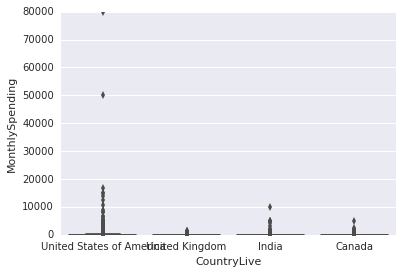

In [9]:
# Generating a boxplot of the distribution for the 4 nations

sns.boxplot(x = 'CountryLive', y = 'MonthlySpending', data = monthly_spenders_countries)

There appear to be some extreme outliers that make it difficult to view the boxplots. Another boxplot will be generated once all extreme outliers are removed.

In [10]:
# Retrieving statistics on the MonthlySpending column

monthly_spenders_countries['MonthlySpending'].describe()


count     3915.000000
mean       196.990196
std       1701.091730
min          0.000000
25%          0.000000
50%          2.000000
75%         40.000000
max      80000.000000
Name: MonthlySpending, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


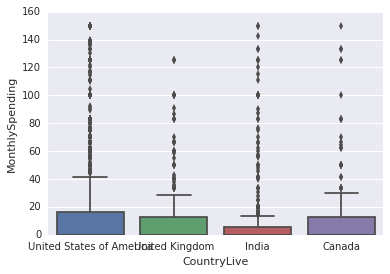

In [11]:
# Removing extreme outliers, which is defined as any points that are
# more than three times the interquartile range paste the upper quartile
# (the lower quartile is not applicable, in this case)
no_outliers = monthly_spenders_countries[monthly_spenders_countries['MonthlySpending'] < (40+(3*40))]
sns.boxplot(x = 'CountryLive', y = 'MonthlySpending', data = no_outliers)

In [12]:
# Reprinting means for the countries, now without extreme outliers
print(no_outliers.groupby(by='CountryLive').mean()['MonthlySpending'].sort_values(ascending=False))


CountryLive
United States of America    15.749211
United Kingdom              13.458910
Canada                      12.133764
India                       10.976173
Name: MonthlySpending, dtype: float64


When examining the means after removing extreme outliers, India now has the lowest mean, which meets expectations. 

In any instance, the US always has the highest mean, so it's clearly the best country to which to market.  After that, the results aren't as clear.  Two more factors to consider are the respondents' expected income and number of respondents from each country.

In [13]:
# Retrieving statistics for the ExpectedEarning column, grouped by country, 
# which also provides a count of respondents per country

monthly_spenders_countries.groupby(by='CountryLive')['ExpectedEarning'].describe()


,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,219.0,51474.200913,19542.762620,10000.0,40000.0,50000.0,60000.0,200000.0
India,425.0,64741.656471,131878.832898,6000.0,12000.0,32000.0,70000.0,1000000.0
United Kingdom,240.0,41374.562500,66759.547637,6000.0,25000.0,30000.0,40000.0,1000000.0
United States of America,2781.0,64750.206041,45576.201478,6000.0,50000.0,60000.0,75000.0,1000000.0


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

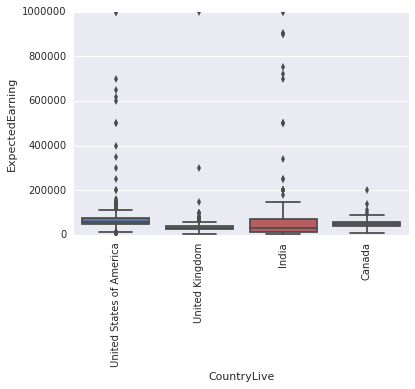

In [25]:
# Generating a boxplot for ExpectedEarning

sns.boxplot(x = 'CountryLive', y = 'ExpectedEarning', data = monthly_spenders_countries)
plt.xticks(rotation=90)

In [21]:
# Removing potential outliers

no_earning_outliers = monthly_spenders_countries[monthly_spenders_countries['ExpectedEarning'] < 200000]
no_earning_outliers.groupby(by='CountryLive')['ExpectedEarning'].describe()


,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
Canada,218.0,50792.889908,16779.590574,10000.0,40000.0,50000.0,60000.0,140000.0
India,404.0,40090.599010,33409.872347,6000.0,11500.0,28400.0,60000.0,180000.0
United Kingdom,238.0,36260.063025,17563.461265,6000.0,25000.0,30000.0,40000.0,150000.0
United States of America,2766.0,62111.468908,19868.543459,6000.0,50000.0,60000.0,75000.0,160000.0


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

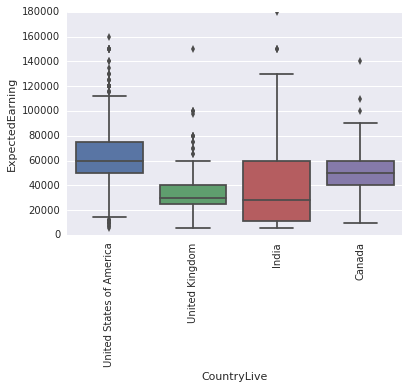

In [24]:
# Generating boxplot of ExpectedEarning without outliers
sns.boxplot(x = 'CountryLive', y = 'ExpectedEarning', data = no_earning_outliers)
plt.xticks(rotation=90)

Looking at those two factors, the UK could be ruled out as a potential market, as it was ranked the lowest in count and ExpectedEarning.  As for the other two nations, there isn't a clear favorite.  On the one hand, Canada has a higher average expected earning (with outliers removed), but India has a higher respondent count (even taking outliers into account).  If one had to be selected, I would recommend Canada, under the assumption that the e-learning organization offers a significant amount of live classes.  It would make planning class times much easier if all students are within a couple of time zones.  